In [76]:
import numpy as np
import glob
import matplotlib.pyplot as plt

name_file = "./balloons_ms"

images = glob.glob(f'./spectral_data/{name_file}/*.png')
images.sort()

for i in range(len(images)):
    img = plt.imread(images[i])
    if i == 0:
        stacked = img
    else:
        stacked = np.dstack((stacked,img))

stacked.shape

(512, 512, 31)

In [77]:
from spec2rgb import COLOR_SPACE
print("Allowed color spaces", list(COLOR_SPACE.keys()))

Allowed color spaces ['sRGB', 'AdobeRGB', 'AppleRGB', 'UHDTV', 'CIERGB']


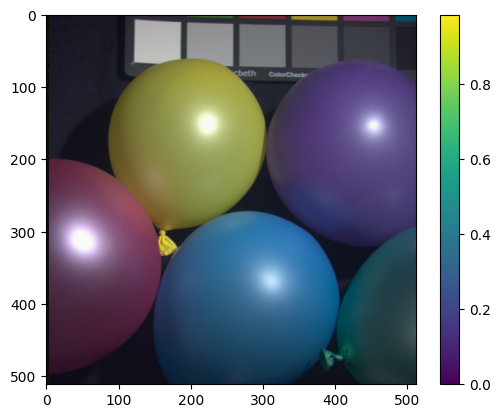

In [78]:
from spec2rgb import ColourSystem

color_space = "sRGB"
start, end = 400, 700 
number_bands = 31

cs = ColourSystem(cs=color_space, start=start, end=end, num=number_bands)

img_rgb = cs.spec_to_rgb(stacked)

img_rgb = np.clip(img_rgb, 0, 1)

#post processing, because the image is too dark
img_rgb = img_rgb ** 0.5

plt.imshow(img_rgb)
plt.colorbar()
plt.show()

In [79]:
plt.imsave(f'created_images_rgb/{name_file}.png', img_rgb)

send image to model in hugginface with transformers library

In [80]:
from transformers import pipeline
from PIL import Image

estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

img_rgb = Image.fromarray((img_rgb * 255).astype(np.uint8))

result = estimator(images = img_rgb)

plt.imshow(result["predicted_depth"].squeeze(), cmap="gray")
plt.colorbar()

post-processing

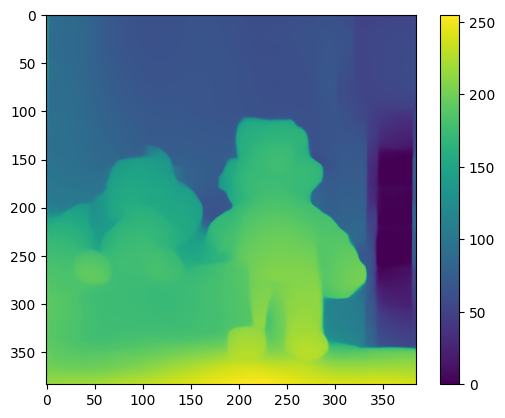

In [ ]:
max_val = (2 ** (8 * 1)) - 1

result_ = max_val * (result["predicted_depth"].squeeze() - result["predicted_depth"].min()) / (result["predicted_depth"].max() - result["predicted_depth"].min())

plt.imshow(result_)
plt.colorbar()

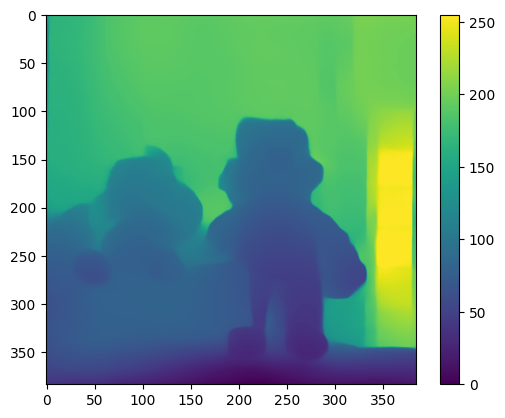

In [ ]:
plt.imshow( ( 255-result_ ) + result_.min() )
plt.colorbar()

In [ ]:
# save
plt.imsave(f'estimated_images/{name_file}.png', ( 255-result_ ) + result_.min(), cmap="gray" )